In [1]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt


### Some analysis for advanced processing

In [7]:
# REPLACE to your data origin
d_path = "/home/datasets4/stein/jena_experiment_data_raw/"
out_path = "/home/datasets4/stein/jena_experiment_data_various_products/"

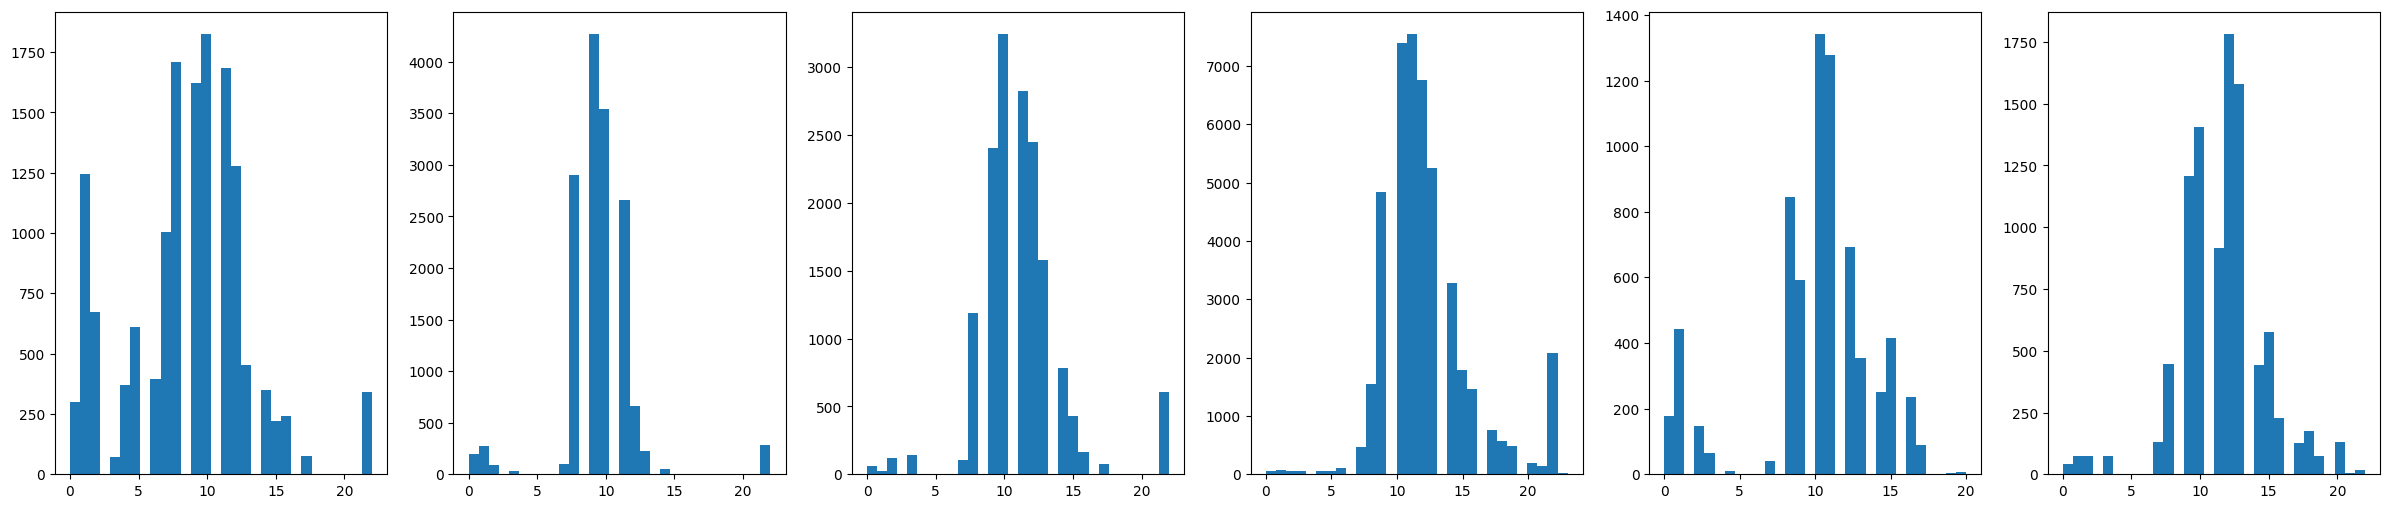

In [4]:
# Sample time distribution from the original files
stack = []
mypath = d_path + "jena_experiment/moisture"
onlyfiles = [f.split("D")[0] for f in listdir(mypath)]
for folder in onlyfiles: 
   p = mypath +  "/" + folder + "Dataset" + "/" + folder + "data.csv"
   stack.append(pd.read_csv(p, on_bad_lines='skip', sep= ";"))

fig, ax = plt.subplots(1, 6, figsize = (30,6))
for n, x in enumerate(stack): 
    _ = ax[n].hist(pd.to_datetime(x["time"], format='%H:%M:%S').dt.hour.values, bins=30)
# Looks okay. Shouldnt introduce much bias

### How does the moisture relate to the station measurements?

In [8]:
weather = pd.read_csv(out_path + "station_processed/simple_soil_station.csv")
moisture = pd.read_csv(out_path + "covariates_processed/moisture_base.csv")

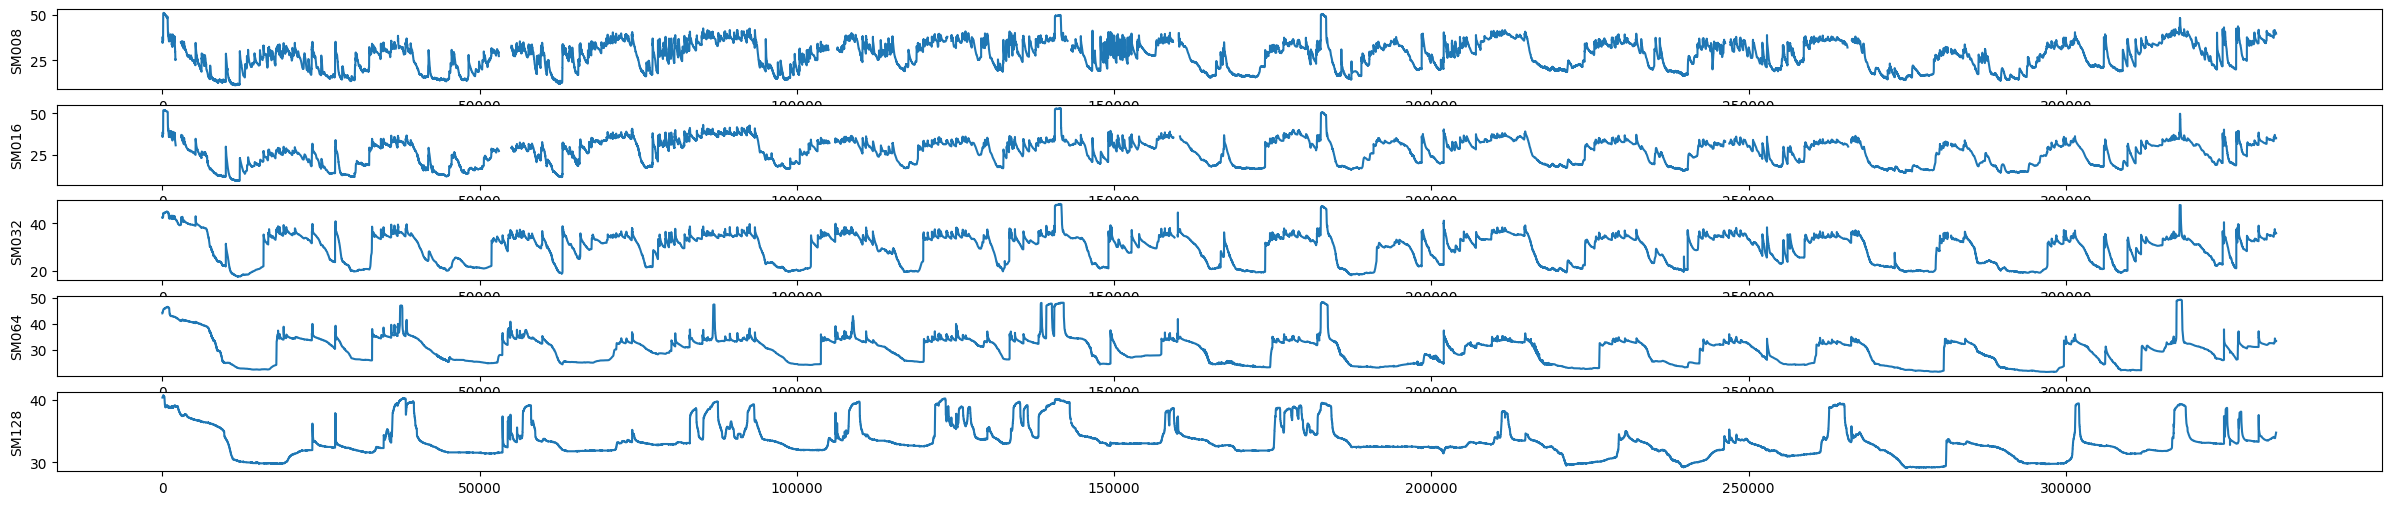

In [9]:
stack = [x for x in weather.columns if "SM" in x]
fig, ax = plt.subplots(5, 1, figsize = (30,6))
for n, x in enumerate(stack): 
    ax[n].plot(weather[x])
    ax[n].set_ylabel(x)

In [11]:
weather = pd.read_csv(out_path + "station_processed/simple_soil_station.csv")
moisture = pd.read_csv(out_path + "covariates_processed/moisture_base.csv")
moisture["datetime"] = pd.to_datetime(moisture["datetime"])
weather["datetime"] = pd.to_datetime(weather["datetime"]) + pd.Timedelta(minutes=0)
selection = weather.loc[weather["datetime"].isin(moisture["datetime"]), ["datetime"] + [x for x in weather.columns if "SM" in x]]
a = moisture.merge(selection, on= "datetime", how = "left")
len(a) == len(moisture)
# Prediction might be harder than I think... Lets just make a low resolution product for now. 
a.corr()

,Vol10,Vol20,Vol30,Vol40,Vol60,Vol100,SM008,SM016,SM032,SM064,SM128
Vol10,1.000000,0.841988,0.713310,0.607257,0.433119,0.302081,0.570810,0.516598,0.527183,0.392301,0.221464
Vol20,0.841988,1.000000,0.860186,0.727520,0.476176,0.338149,0.616573,0.600476,0.669927,0.533115,0.337897
Vol30,0.713310,0.860186,1.000000,0.889188,0.660817,0.470447,0.423791,0.453309,0.644531,0.590828,0.342369
Vol40,0.607257,0.727520,0.889188,1.000000,0.752309,0.503774,0.280624,0.309573,0.574993,0.581488,0.309127
Vol60,0.433119,0.476176,0.660817,0.752309,1.000000,0.593250,-0.062944,-0.047470,0.272716,0.445263,0.215259
Vol100,0.302081,0.338149,0.470447,0.503774,0.593250,1.000000,-0.095505,-0.105336,0.109687,0.293703,0.160146
SM008,0.570810,0.616573,0.423791,0.280624,-0.062944,-0.095505,1.000000,0.939792,0.771901,0.467251,0.375603
SM016,0.516598,0.600476,0.453309,0.309573,-0.047470,-0.105336,0.939792,1.000000,0.854268,0.555295,0.465084
SM032,0.527183,0.669927,0.644531,0.574993,0.272716,0.109687,0.771901,0.854268,1.000000,0.750827,0.495230
SM064,0.392301,0.533115,0.590828,0.581488,0.445263,0.293703,0.467251,0.555295,0.750827,1.000000,0.709880
